In [24]:
import numpy as np 
import math

import csv
#Random seed for reproducibility
np.random.seed(1000)

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Loading and sorting

In [25]:
dataframe = pd.read_csv("/kaggle/input/euro-vs-other-currencies/eurofxref-hist.csv")

dataframe = dataframe.iloc[::-1]
dataframe = dataframe.reset_index(drop=True)

dataframe = dataframe.drop(columns = "Unnamed: 42")
dataframe

,Date,USD,JPY,BGN,CYP,CZK,DKK,EEK,GBP,HUF,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,1999-01-04,1.1789,133.73,NaN,0.58231,35.107,7.4501,15.6466,0.71110,251.48,...,NaN,NaN,1398.59,NaN,NaN,2.2229,NaN,1.9554,NaN,6.9358
1,1999-01-05,1.1790,130.96,NaN,0.58230,34.917,7.4495,15.6466,0.71220,250.80,...,NaN,NaN,1373.01,NaN,NaN,2.2011,NaN,1.9655,NaN,6.7975
2,1999-01-06,1.1743,131.42,NaN,0.58200,34.850,7.4452,15.6466,0.70760,250.67,...,NaN,NaN,1359.54,NaN,NaN,2.1890,NaN,1.9699,NaN,6.7307
3,1999-01-07,1.1632,129.43,NaN,0.58187,34.886,7.4431,15.6466,0.70585,250.09,...,NaN,NaN,1337.16,NaN,NaN,2.1531,NaN,1.9436,NaN,6.8283
4,1999-01-08,1.1659,130.09,NaN,0.58187,34.938,7.4433,15.6466,0.70940,250.15,...,NaN,NaN,1366.73,NaN,NaN,2.1557,NaN,1.9537,NaN,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,2023-09-01,1.0844,157.47,1.9558,NaN,24.118,7.4528,NaN,0.85538,383.73,...,4.1163,89.6970,1428.30,18.5188,5.0397,1.8164,61.312,1.4640,37.916,20.2711
6319,2023-09-04,1.0801,158.11,1.9558,NaN,24.108,7.4527,NaN,0.85550,383.05,...,4.1201,89.3045,1423.17,18.4356,5.0279,1.8170,61.144,1.4622,38.030,20.4602
6320,2023-09-05,1.0731,158.20,1.9558,NaN,24.161,7.4533,NaN,0.85535,386.00,...,4.0724,89.0965,1431.25,18.5186,5.0060,1.8297,61.210,1.4614,38.079,20.6045
6321,2023-09-06,1.0745,158.18,1.9558,NaN,24.217,7.4563,NaN,0.85503,389.15,...,4.0902,89.3410,1430.83,18.8455,5.0222,1.8224,61.257,1.4624,38.166,20.6702


## Dropping currencies no longer in circulation

In [26]:
print(dataframe.columns[dataframe.iloc[-1].isna()].tolist())
dataframe = dataframe.drop(columns = dataframe.columns[dataframe.iloc[-1].isna()].tolist())

dataframe

['CYP', 'EEK', 'LTL', 'LVL', 'MTL', 'ROL', 'SIT', 'SKK', 'HRK', 'RUB', 'TRL']


,Date,USD,JPY,BGN,CZK,DKK,GBP,HUF,PLN,RON,...,ILS,INR,KRW,MXN,MYR,NZD,PHP,SGD,THB,ZAR
0,1999-01-04,1.1789,133.73,NaN,35.107,7.4501,0.71110,251.48,4.0712,NaN,...,NaN,NaN,1398.59,NaN,NaN,2.2229,NaN,1.9554,NaN,6.9358
1,1999-01-05,1.1790,130.96,NaN,34.917,7.4495,0.71220,250.80,4.0245,NaN,...,NaN,NaN,1373.01,NaN,NaN,2.2011,NaN,1.9655,NaN,6.7975
2,1999-01-06,1.1743,131.42,NaN,34.850,7.4452,0.70760,250.67,4.0065,NaN,...,NaN,NaN,1359.54,NaN,NaN,2.1890,NaN,1.9699,NaN,6.7307
3,1999-01-07,1.1632,129.43,NaN,34.886,7.4431,0.70585,250.09,4.0165,NaN,...,NaN,NaN,1337.16,NaN,NaN,2.1531,NaN,1.9436,NaN,6.8283
4,1999-01-08,1.1659,130.09,NaN,34.938,7.4433,0.70940,250.15,4.0363,NaN,...,NaN,NaN,1366.73,NaN,NaN,2.1557,NaN,1.9537,NaN,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,2023-09-01,1.0844,157.47,1.9558,24.118,7.4528,0.85538,383.73,4.4685,4.9459,...,4.1163,89.6970,1428.30,18.5188,5.0397,1.8164,61.312,1.4640,37.916,20.2711
6319,2023-09-04,1.0801,158.11,1.9558,24.108,7.4527,0.85550,383.05,4.4663,4.9460,...,4.1201,89.3045,1423.17,18.4356,5.0279,1.8170,61.144,1.4622,38.030,20.4602
6320,2023-09-05,1.0731,158.20,1.9558,24.161,7.4533,0.85535,386.00,4.4890,4.9496,...,4.0724,89.0965,1431.25,18.5186,5.0060,1.8297,61.210,1.4614,38.079,20.6045
6321,2023-09-06,1.0745,158.18,1.9558,24.217,7.4563,0.85503,389.15,4.5010,4.9603,...,4.0902,89.3410,1430.83,18.8455,5.0222,1.8224,61.257,1.4624,38.166,20.6702


## Dropping currencies not available in jan 4, 1999 + islandic Korona

In [27]:
print(dataframe.columns[dataframe.isna().any()].tolist())
dataframe = dataframe.drop(columns = dataframe.columns[dataframe.isna().any()].tolist())

dataframe

['BGN', 'RON', 'ISK', 'TRY', 'BRL', 'CNY', 'IDR', 'ILS', 'INR', 'MXN', 'MYR', 'PHP', 'THB']


,Date,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
0,1999-01-04,1.1789,133.73,35.107,7.4501,0.71110,251.48,4.0712,9.4696,1.6168,8.8550,1.9100,1.8004,9.1332,1398.59,2.2229,1.9554,6.9358
1,1999-01-05,1.1790,130.96,34.917,7.4495,0.71220,250.80,4.0245,9.4025,1.6123,8.7745,1.8944,1.7965,9.1341,1373.01,2.2011,1.9655,6.7975
2,1999-01-06,1.1743,131.42,34.850,7.4452,0.70760,250.67,4.0065,9.3050,1.6116,8.7335,1.8820,1.7711,9.1010,1359.54,2.1890,1.9699,6.7307
3,1999-01-07,1.1632,129.43,34.886,7.4431,0.70585,250.09,4.0165,9.1800,1.6165,8.6295,1.8474,1.7602,9.0131,1337.16,2.1531,1.9436,6.8283
4,1999-01-08,1.1659,130.09,34.938,7.4433,0.70940,250.15,4.0363,9.1650,1.6138,8.5900,1.8406,1.7643,9.0302,1366.73,2.1557,1.9537,6.7855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,2023-09-01,1.0844,157.47,24.118,7.4528,0.85538,383.73,4.4685,11.8960,0.9574,11.4860,1.6737,1.4656,8.5068,1428.30,1.8164,1.4640,20.2711
6319,2023-09-04,1.0801,158.11,24.108,7.4527,0.85550,383.05,4.4663,11.9010,0.9548,11.5005,1.6708,1.4686,8.4620,1423.17,1.8170,1.4622,20.4602
6320,2023-09-05,1.0731,158.20,24.161,7.4533,0.85535,386.00,4.4890,11.9145,0.9548,11.5435,1.6859,1.4652,8.4134,1431.25,1.8297,1.4614,20.6045
6321,2023-09-06,1.0745,158.18,24.217,7.4563,0.85503,389.15,4.5010,11.9105,0.9561,11.4920,1.6801,1.4659,8.4261,1430.83,1.8224,1.4624,20.6702


In [28]:
dataframe["Date"] =  pd.to_datetime(dataframe["Date"], format="%Y-%m-%d")
#dataframe = dataframe.set_index('Date')
dataframe["Date"]

0      1999-01-04
1      1999-01-05
2      1999-01-06
3      1999-01-07
4      1999-01-08
          ...    
6318   2023-09-01
6319   2023-09-04
6320   2023-09-05
6321   2023-09-06
6322   2023-09-07
Name: Date, Length: 6323, dtype: datetime64[ns]

In [29]:
#["USD"]
if(True):
    temp = dataframe.loc[:, dataframe.columns != 'Date']

    dataframe.loc[:, dataframe.columns != 'Date'] = (temp - temp.min())/(temp.max() - temp.min())
    
dataframe

,Date,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
0,1999-01-04,0.457095,0.552268,0.777394,0.536145,0.343600,0.115166,0.495593,0.364278,0.913793,0.320475,0.820251,0.980114,0.446976,0.435827,0.716248,0.673659,0.056857
1,1999-01-05,0.457224,0.517837,0.765226,0.524096,0.346300,0.111808,0.468864,0.346999,0.907684,0.304672,0.803100,0.973596,0.447126,0.411587,0.697537,0.685563,0.047685
2,1999-01-06,0.451150,0.523555,0.760935,0.437751,0.335010,0.111166,0.458562,0.321891,0.906734,0.296623,0.789468,0.931150,0.441640,0.398823,0.687151,0.690748,0.043254
3,1999-01-07,0.436805,0.498819,0.763240,0.395582,0.330715,0.108302,0.464286,0.289702,0.913386,0.276207,0.751429,0.912934,0.427073,0.377615,0.656339,0.659753,0.049727
4,1999-01-08,0.440295,0.507023,0.766571,0.399598,0.339428,0.108598,0.475618,0.285839,0.909720,0.268453,0.743953,0.919786,0.429907,0.405636,0.658570,0.671656,0.046889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,2023-09-01,0.334970,0.847359,0.073647,0.590361,0.697705,0.768285,0.722985,0.989107,0.018599,0.836965,0.560466,0.420622,0.343166,0.463981,0.367350,0.094520,0.941266
6319,2023-09-04,0.329413,0.855314,0.073007,0.588353,0.698000,0.764927,0.721726,0.990395,0.015069,0.839812,0.557278,0.425635,0.335742,0.459120,0.367865,0.092398,0.953807
6320,2023-09-05,0.320367,0.856433,0.076401,0.600402,0.697632,0.779495,0.734718,0.993871,0.015069,0.848253,0.573879,0.419953,0.327688,0.466777,0.378766,0.091456,0.963378
6321,2023-09-06,0.322176,0.856184,0.079987,0.660643,0.696846,0.795052,0.741587,0.992841,0.016834,0.838143,0.567502,0.421123,0.329792,0.466379,0.372500,0.092634,0.967735


In [30]:
symbol_list = [f"{i}" for i in range(0,10)]
symbol_list.extend(["A", "B", "C", "D", "E", "F"])

final_list = []

for i1 in symbol_list:
    for i2 in symbol_list:
        final_list.append(i1+i2)
                
final_list.pop(0)
len(final_list)

255

-5.276794740794876


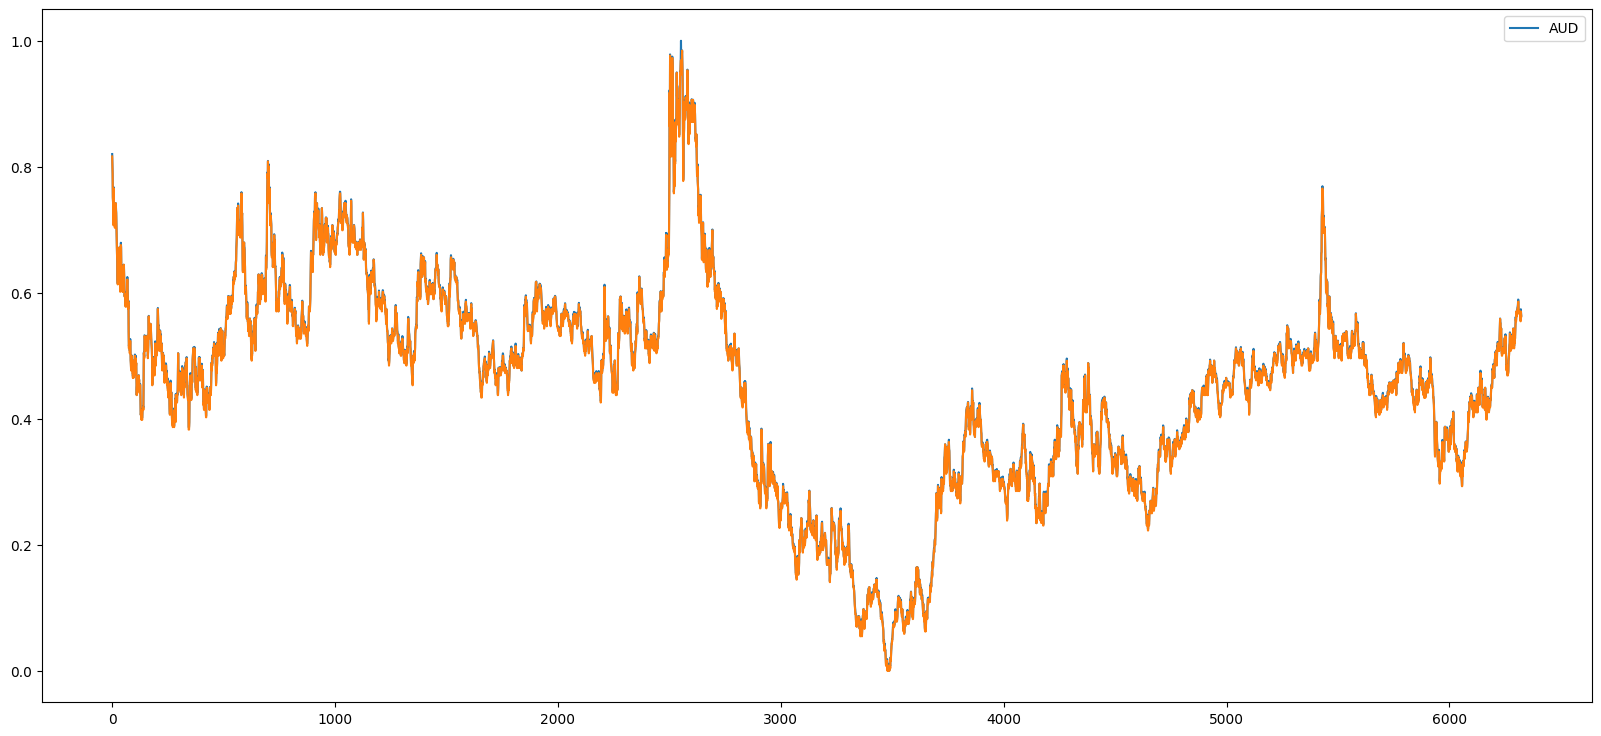

In [31]:
currency = "AUD"
bin_size = 256
dataframe.plot(y = currency, figsize=(20, 9))
q = pd.cut(dataframe[currency], bins = np.arange(0, 1, 1/bin_size), labels=False)
q = q.ffill()
#q = pd.qcut(dataframe['USD'], 1000, labels=False, precision = 10)

#q['USD'] = dataframe['USD']
plt.plot(q.index, q.values/bin_size) 


MSE = ((q/bin_size - dataframe[currency])**2).sum()/len(dataframe[currency])
print(np.log10(MSE))
plt.show()

In [32]:
currency_list = dataframe.columns[1:].to_list()

In [33]:
trans_df = pd.DataFrame()

for i in currency_list:
    q = pd.cut(dataframe[i], bins = np.arange(0, 1, 1/bin_size), labels = final_list)
    q = q.ffill()

    trans_df[i] = q

In [34]:
trans_df

,USD,JPY,CZK,DKK,GBP,HUF,PLN,SEK,CHF,NOK,AUD,CAD,HKD,KRW,NZD,SGD,ZAR
0,76,8E,C8,8A,58,1E,7F,5E,EA,53,D2,FB,73,70,B8,AD,0F
1,76,85,C4,87,59,1D,79,59,E9,4E,CE,FA,73,6A,B3,B0,0D
2,74,87,C3,71,56,1D,76,53,E9,4C,CB,EF,72,67,B0,B1,0C
3,70,80,C4,66,55,1C,77,4B,EA,47,C1,EA,6E,61,A9,A9,0D
4,71,82,C5,67,57,1C,7A,4A,E9,45,BF,EC,6F,68,A9,AC,0D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6318,56,D9,13,98,B3,C5,BA,FE,05,D7,90,6C,58,77,5F,19,F1
6319,55,DB,13,97,B3,C4,B9,FE,04,D7,8F,6D,56,76,5F,18,F5
6320,53,DC,14,9A,B3,C8,BD,FF,04,DA,93,6C,54,78,61,18,F7
6321,53,DC,15,AA,B3,CC,BE,FF,05,D7,92,6C,55,78,60,18,F8


In [35]:
cross_list = []

for i in range(0, len(trans_df)):
    cross_list.append("".join(trans_df.iloc[i].to_list()))
    
#cross_list

In [36]:
df = pd.DataFrame(cross_list)
df.to_csv('new.csv', index=False, header=False )

In [37]:
df

,0
0,768EC88A581E7F5EEA53D2FB7370B8AD0F
1,7685C487591D7959E94ECEFA736AB3B00D
2,7487C371561D7653E94CCBEF7267B0B10C
3,7080C466551C774BEA47C1EA6E61A9A90D
4,7182C567571C7A4AE945BFEC6F68A9AC0D
...,...
6318,56D91398B3C5BAFE05D7906C58775F19F1
6319,55DB1397B3C4B9FE04D78F6D56765F18F5
6320,53DC149AB3C8BDFF04DA936C54786118F7
6321,53DC15AAB3CCBEFF05D7926C55786018F8


In [38]:
q = pd.cut(dataframe[currency], bins = np.arange(0, 1, 1/bin_size), labels = final_list)
q = q.ffill()
q.isna().sum()
q

0       D2
1       CE
2       CB
3       C1
4       BF
        ..
6318    90
6319    8F
6320    93
6321    92
6322    91
Name: AUD, Length: 6323, dtype: category
Categories (255, object): ['01' < '02' < '03' < '04' ... 'FC' < 'FD' < 'FE' < 'FF']